<a href="https://colab.research.google.com/github/KauanIzidoro/polynomial-regression/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Application of __Polynomial Regression__ to stress-strain curve interpolation to determine the tenacity modulus

See the full documentation in the following repository: [polynomial-regression](https://github.com/KauanIzidoro/polynomial-regression)


### Student:

<img src="https://media.discordapp.net/attachments/1317159100529770570/1317159189520584734/38a6f0f2-a02d-4017-be29-787f12ecef46.jpg?ex=675dab96&is=675c5a16&hm=7de955e72eade61c25d9ef76a9ba6a24a4f80bc742a8f470e7af05c9e601a408&=&format=webp&width=676&height=676" width="100" style="float: left; margin-right: 5px;" border="5px" />

  __Kauan H. S. Izidoro__ <br>
  [Faculade SENAI Sorocaba](https://sp.senai.br/unidade/sorocaba/) <br>

  


#Glossary:
1. Preparing the data
2. Train Model with Polynomial Regression (RSS)
3. Validation the Model


# 1. Preparing the dataset

### 1.1 Imports


In [132]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 1.2 Data loading and visualization

In [2]:
stretching_test_data = pd.read_csv('/content/stretching-test.csv')
stretching_test_data.head(15)

,deformation,tension
0,0.237891,276.910383
1,0.514648,762.828736
2,0.779687,1157.172504
3,1.041211,1540.891327
4,1.301953,1910.046537
5,1.562304,2257.503215
6,1.822851,2602.965127
7,2.083203,2927.658794
8,2.343554,3233.199977
9,2.604101,3516.886674


In [3]:
stretching_test_data.describe()

,deformation,tension
count,846.000000,846.000000
mean,110.286426,4494.907561
std,63.636379,579.546305
min,0.237891,276.288923
25%,55.273492,4354.174260
50%,110.286406,4435.046648
75%,165.299539,4546.597873
max,220.312469,5497.285017


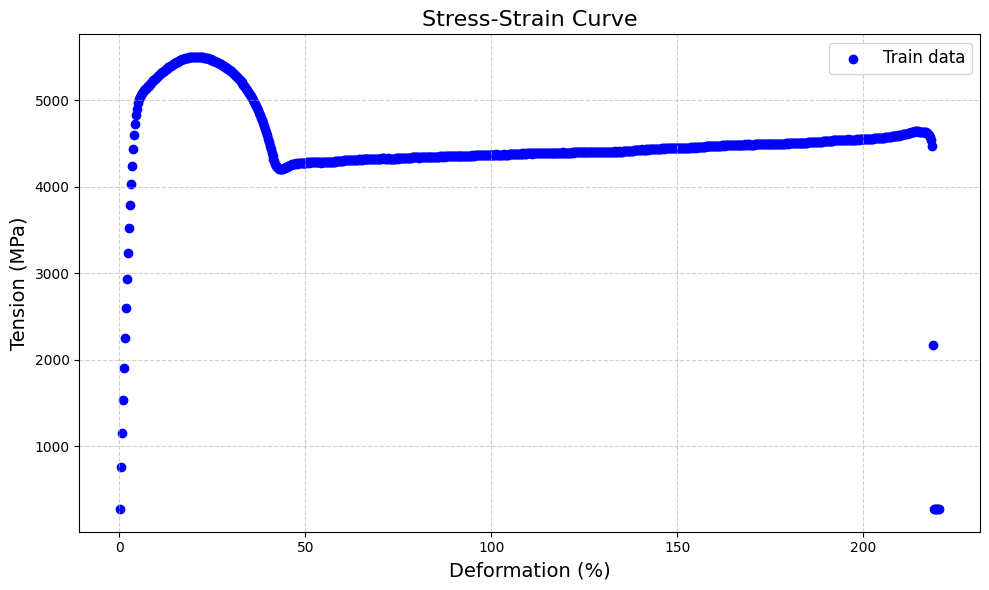

In [52]:
deformation = stretching_test_data["deformation"]
tension = stretching_test_data["tension"]

plt.figure(figsize=(10, 6))
plt.scatter(deformation, tension, color='blue', label='Train data', alpha=1)

plt.title("Stress-Strain Curve", fontsize=16)
plt.xlabel("Deformation (%)", fontsize=14)
plt.ylabel("Tension (MPa)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()

# 2. Model training using Residual Sum of Squares

$$
\text{SSR} = \sum_{i=1}^{N} \left( y_i - p(x_i) \right)^2
$$

Where:
* $y_i​$ = actual values,<br>
* $p(x_i)$ = predicted values,<br>
* $N$ = total numbers of data.<br><br>


### 2.1 Train function


In [133]:
def train(x_train, x_test, y_train, y_test, start_degree=3, max_degree=20, tolerance=0.05):
    """
    This function starts training the model by default with a cubic exponent.
    As the epochs progress, the MAE metric is checked in order to have the model
    with this value being the minimum among the trained models.

    Args:
      x_train: Training feature data.
      x_test: Testing feature data.
      y_train: Training target data.
      y_test: Testing target data.
      start_degree (int): Starting degree of the polynomial.
      max_degree (int): Maximum degree of the polynomial to avoid overfitting.
      tolerance (float): Minimum error improvement threshold to stop fitting.

    Returns:
      tuple: Trained model (np.poly1d), degree of the polynomial with the lowest MAE, and DataFrame with the results.
    """
    start_train = time.time()
    best_model = None
    best_degree = start_degree
    best_mae = float('inf')
    results = []

    for degree in range(start_degree, max_degree + 1):
        model = np.poly1d(np.polyfit(x_train.flatten(), y_train.flatten(), degree))
        y_test_pred = model(x_test.flatten())
        mae = mean_absolute_error(y_test, y_test_pred)
        results.append({
            'Degree': degree,
            'Model': str(model),
            'MAE': round(mae, 5)
        })
        if mae < best_mae:
            best_model = model
            best_degree = degree
            best_mae = mae

    end_train = time.time()
    print(f"Training time: {end_train - start_train:.2f} seconds")
    results_df = pd.DataFrame(results)
    print(f"Model degree: {best_degree} \nMAE: {best_mae:.5f}")
    return best_model, best_degree, results_df


In [134]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_x.fit_transform(stretching_test_data["deformation"].values.reshape(-1, 1))
Y = scaler_y.fit_transform(stretching_test_data["tension"].values.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model, model_degree, results = train(x_train=x_train,
                                     x_test=x_test,
                                     y_train=y_train,
                                     y_test=y_test)

Training time: 0.03 seconds
Model degree: 20 
MAE: 0.01186


<ipython-input-133-909961a9dd94>:26: RankWarning: Polyfit may be poorly conditioned
  model = np.poly1d(np.polyfit(x_train.flatten(), y_train.flatten(), degree))
<ipython-input-133-909961a9dd94>:26: RankWarning: Polyfit may be poorly conditioned
  model = np.poly1d(np.polyfit(x_train.flatten(), y_train.flatten(), degree))
<ipython-input-133-909961a9dd94>:26: RankWarning: Polyfit may be poorly conditioned
  model = np.poly1d(np.polyfit(x_train.flatten(), y_train.flatten(), degree))


### 2.1 Model plot

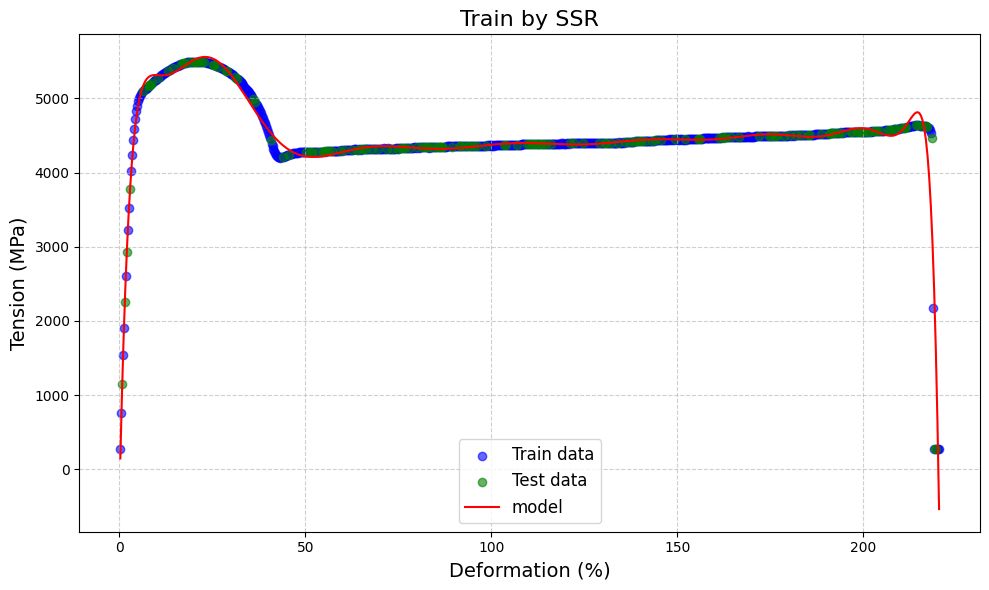

In [137]:
plt.figure(figsize=(10, 6))

plt.scatter(scaler_x.inverse_transform(x_train), scaler_y.inverse_transform(y_train),
            color='blue', label='Train data', alpha=0.6)
plt.scatter(scaler_x.inverse_transform(x_test), scaler_y.inverse_transform(y_test),
            color='green', label='Test data', alpha=0.6)

x_model = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_model = model(x_model.flatten())

plt.plot(scaler_x.inverse_transform(x_model), scaler_y.inverse_transform(y_model.reshape(-1, 1)),
         color='red', label='model')

plt.title("Train by SSR", fontsize=16)
plt.xlabel("Deformation (%)", fontsize=14)
plt.ylabel("Tension (MPa)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# 3. Validation the model

## 3.1 Mean Squared Error (MSE)
The Mean Squared Error is the average of the squared differences between the actual values $yi$​ and the predicted values $\hat{y}_i$​. It measures how well the regression line fits the data.

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:

* $yi​$ = actual values,<br>
* $\hat{y}_i$ = predicted values,<br>
* $n$ = number of data points.<br><br>

MSE is sensitive to outliers because it squares the errors, giving larger penalties to larger errors.

## 3.2 Root Mean Squared Error (RMSE)
The Root Mean Squared Error is simply the square root of MSE. It is easier to interpret because it has the same units as the dependent variable $y$.

$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

RMSE gives a more intuitive sense of how far off, on average, the predictions are from the actual values.


## 3.3 Mean Absolute Error (MAE)
The Mean Absolute Error is the average of the absolute differences between the actual values $yi$​ and the predicted values $\hat{y}_i$. Unlike MSE, it does not square the errors, so it's less sensitive to outliers.

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

MAE is often preferred when the model needs to handle outliers better or when the errors need to be interpreted in their original scale.


## 3.4 Coefficient of Determination (R² Score)
The R² Score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit.

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

Where:<br>
* $\bar{y}$ is the mean of the actual values.<br><br>

An R² of 1 indicates the model explains all the variability, while an R² of 0 means the model explains none of the variability.